In [ ]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [ ]:
train=pd.read_csv("/content/train.csv", parse_dates=["Date"])
features=pd.read_csv("/content/features.csv", parse_dates=["Date"])
stores=pd.read_csv("/content/stores.csv")

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
train=train.merge(stores, on='Store', how='left')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


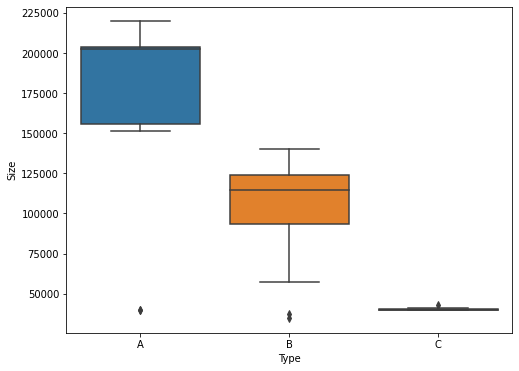

In [ ]:
data = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=data)

In [ ]:
# Within size we can see that there are 3 types of stores, the A are the biggest.

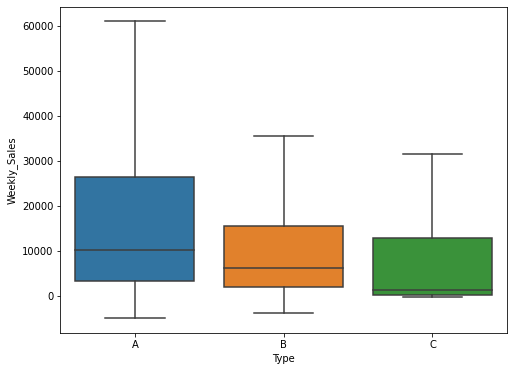

In [ ]:
data = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False)

In [ ]:
# In relation to the type of store we can see that although the C are the smallest ones, they are those that have the highest median sales.

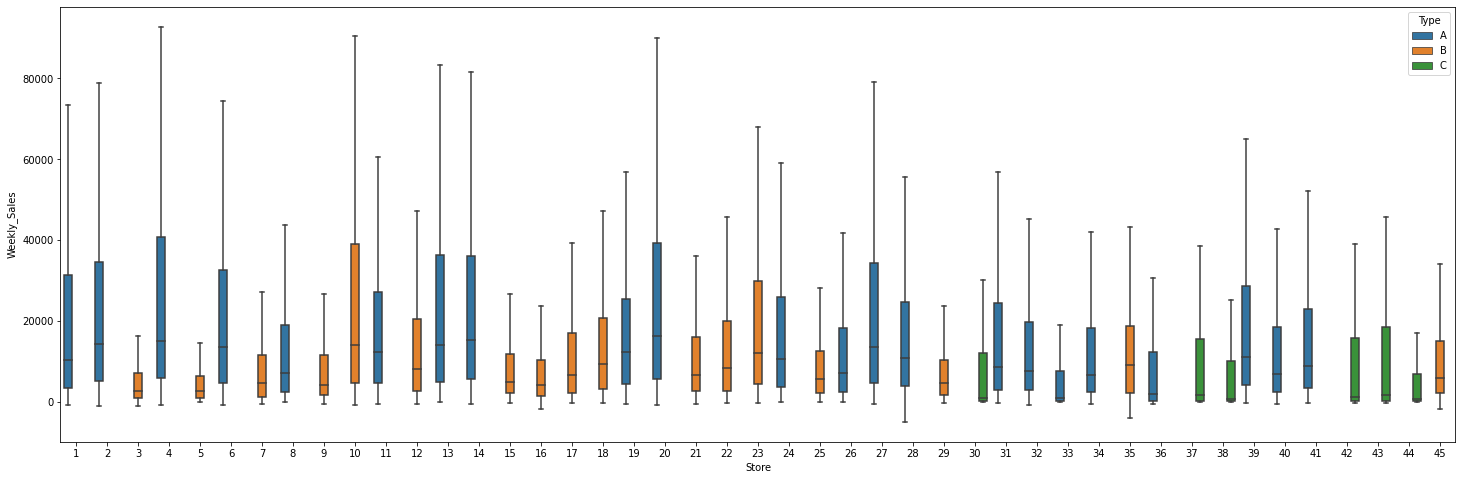

In [ ]:
data = pd.concat([train['Store'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="Type")

In [ ]:
# Store can be the variable giving information on sales
# But store is including much intrinsic information of type, size, and department

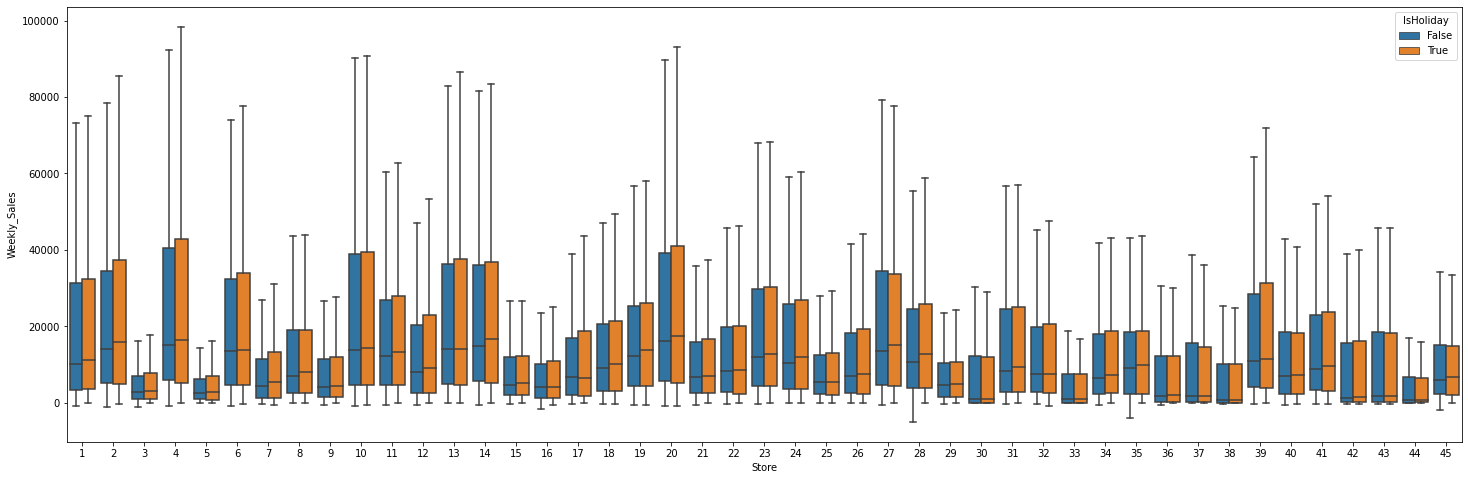

In [ ]:
data = pd.concat([train['Store'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

In [ ]:
# Holiday and Store do not show significant relations but just small higher sales soaring when hoiliday

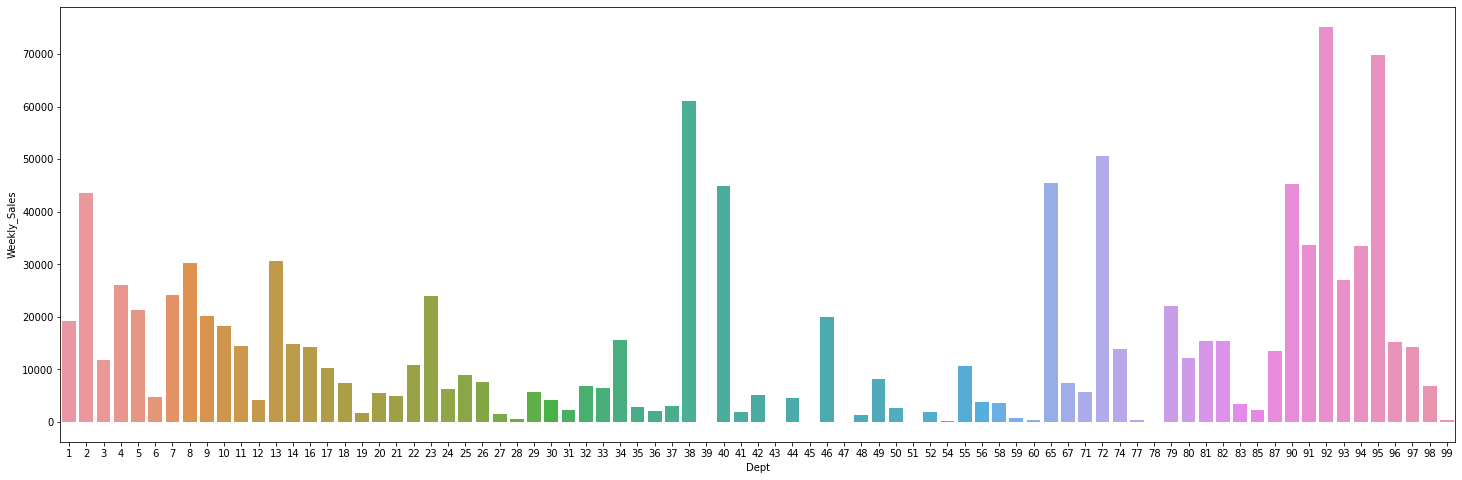

In [ ]:
data= train[['Dept','Weekly_Sales']].groupby('Dept').mean().reset_index()
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=data)

In [ ]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week
train['Day']=train['Date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
features['Week']=features['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


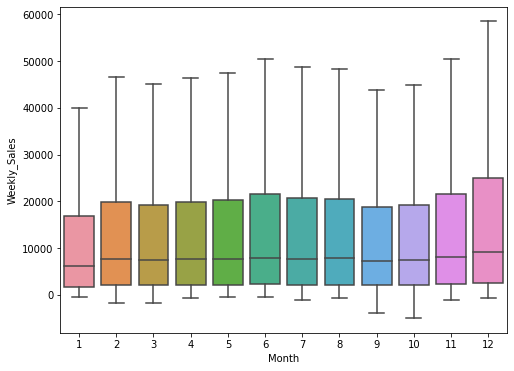

In [ ]:
data = pd.concat([train['Month'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False)

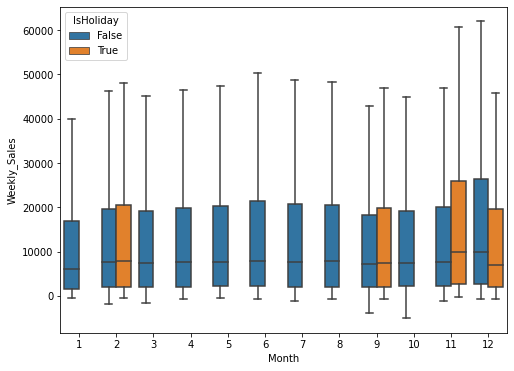

In [ ]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='IsHoliday')

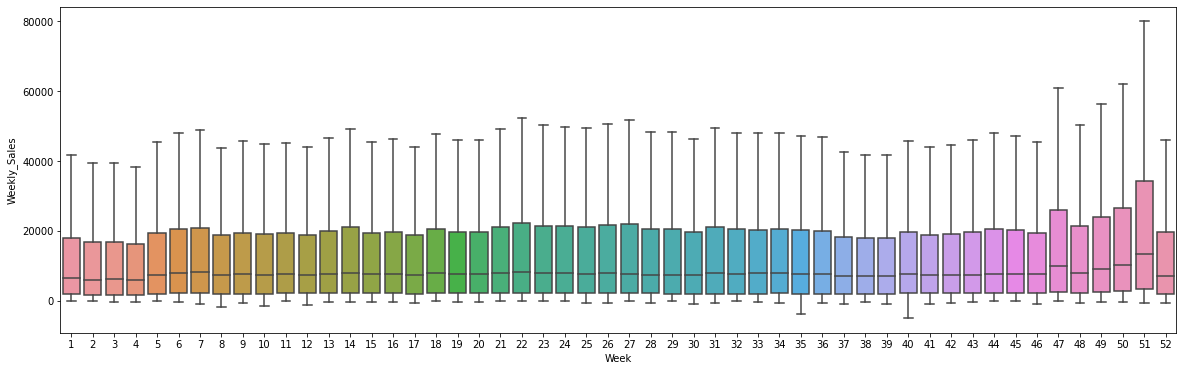

In [ ]:
data = pd.concat([train['Week'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)

In [ ]:
# Some departments make most of the revenues

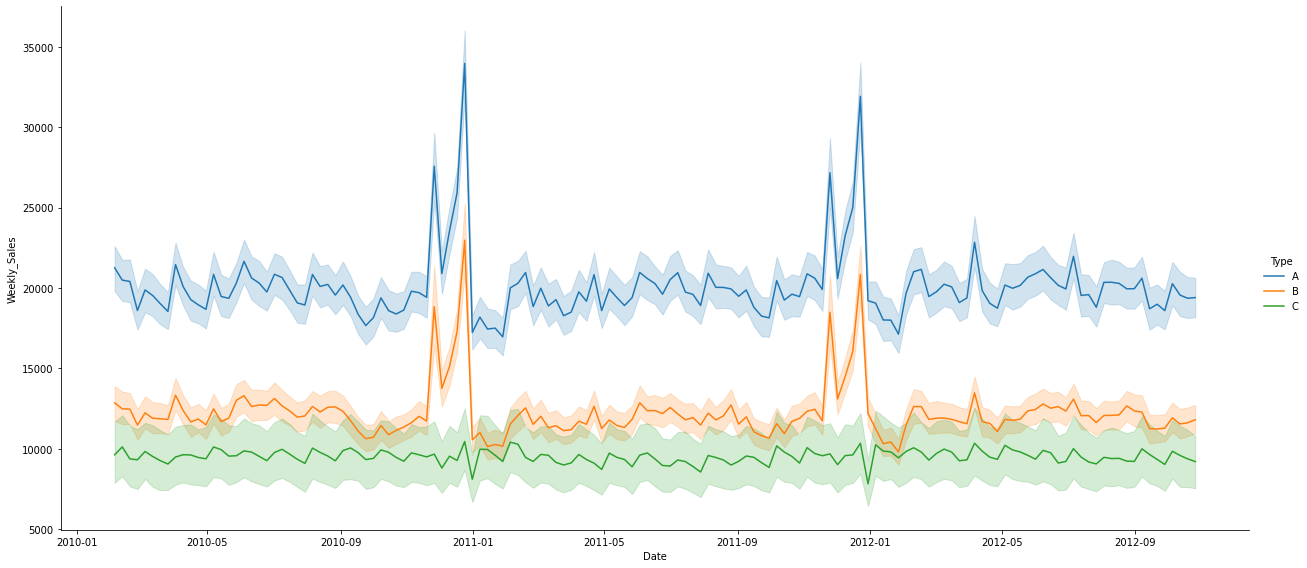

In [ ]:
data = pd.concat([train['Date'], train['Weekly_Sales'],train['Type']], axis=1)
# f, ax = plt.subplots(figsize=(20, 6))
sns.relplot(x='Date', y="Weekly_Sales", data=data, hue='Type',kind='line',height=8, aspect=2.2)


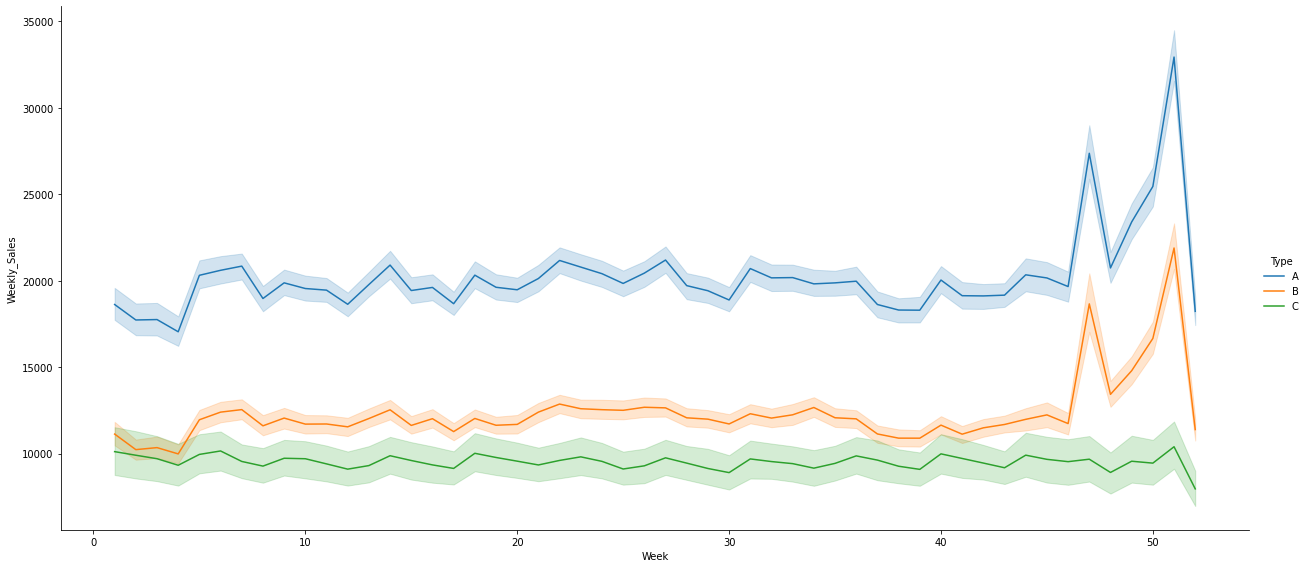

In [ ]:
data = pd.concat([train['Week'], train['Weekly_Sales'],train['Type']], axis=1)
# f, ax = plt.subplots(figsize=(20, 6))
sns.relplot(x='Week', y="Weekly_Sales", data=data, hue='Type',kind='line',height=8, aspect=2.2)

In [ ]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,A,151315,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,2012,9,39,28
421566,45,98,2012-10-05,628.10,False,B,118221,2012,10,40,5
421567,45,98,2012-10-12,1061.02,False,B,118221,2012,10,41,12
421568,45,98,2012-10-19,760.01,False,B,118221,2012,10,42,19


In [ ]:
data_store = train[['Week','Weekly_Sales']].groupby(['Week']).mean().reset_index()
data_store.shape

(52, 2)

In [ ]:
data_store.head()

,Week,Weekly_Sales
0,1,14862.139543
1,2,14030.667886
2,3,14077.870442
3,4,13530.033667
4,5,16029.516788


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9


In [ ]:
data_features = features[['Week','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].groupby(['Week']).mean().reset_index()
data_features.shape

(52, 6)

In [ ]:
data_features.head()

,Week,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,3613.161444,22830.517889,69.137241,670.903803,4055.353222
1,2,3337.716889,11027.824444,40.445904,478.737838,3394.079444
2,3,3842.447222,3219.526111,42.761316,793.230649,2533.178111
3,4,2047.044333,1580.932247,54.269474,279.501867,2465.213889
4,5,24089.612333,1943.950444,198.031818,24865.942619,4185.380333


In [ ]:
data_store = data_store.merge(data_features,on=['Week'],how='left').fillna(.0)

In [ ]:
data_store.index = data_store['Week']
data_store = data_store.drop(['Week'],axis=1)

In [ ]:
data_store.head()

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Week,,,,,,
1,14862.139543,3613.161444,22830.517889,69.137241,670.903803,4055.353222
2,14030.667886,3337.716889,11027.824444,40.445904,478.737838,3394.079444
3,14077.870442,3842.447222,3219.526111,42.761316,793.230649,2533.178111
4,13530.033667,2047.044333,1580.932247,54.269474,279.501867,2465.213889
5,16029.516788,24089.612333,1943.950444,198.031818,24865.942619,4185.380333


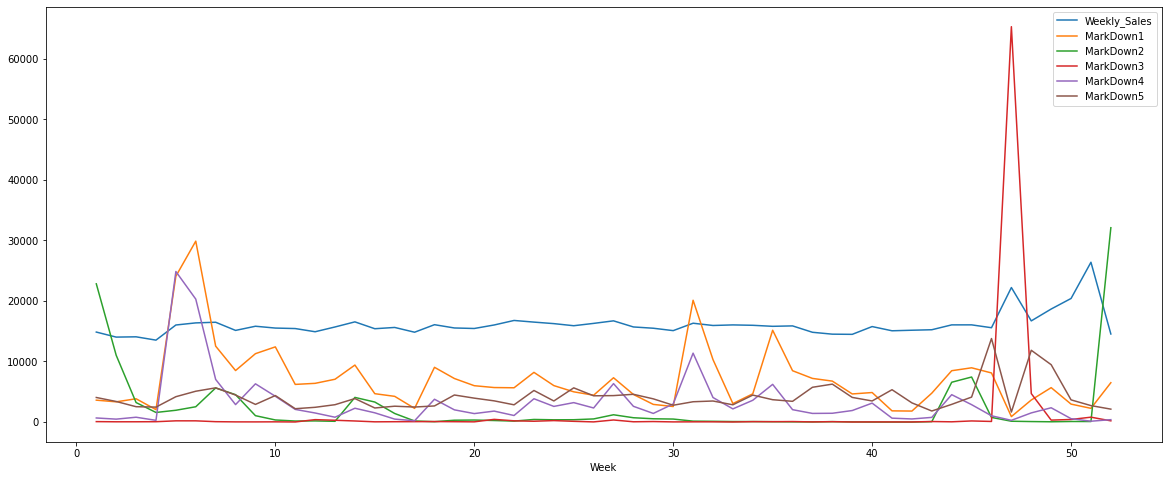

In [ ]:
data_store.plot(figsize=(20,8))

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9


In [ ]:
data_features = features.drop(['Store','Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1).groupby(['Week']).mean().reset_index()
data_features.head()

,Week,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,35.689407,3.242504,173.272421,7.558659,0.0
1,2,36.157111,3.284378,173.375978,7.558659,0.0
2,3,37.254000,3.294252,173.492335,7.558659,0.0
3,4,38.076222,3.295563,173.601897,7.558659,0.0
4,5,38.019611,3.174667,172.216315,7.823822,0.0


In [ ]:
data_store = train[['Week','Weekly_Sales']].groupby(['Week']).mean().reset_index()
data_store = data_store.merge(data_features,on=['Week'],how='left').fillna(.0)

In [ ]:
data_store.head()

,Week,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,14862.139543,35.689407,3.242504,173.272421,7.558659,0.0
1,2,14030.667886,36.157111,3.284378,173.375978,7.558659,0.0
2,3,14077.870442,37.254000,3.294252,173.492335,7.558659,0.0
3,4,13530.033667,38.076222,3.295563,173.601897,7.558659,0.0
4,5,16029.516788,38.019611,3.174667,172.216315,7.823822,0.0


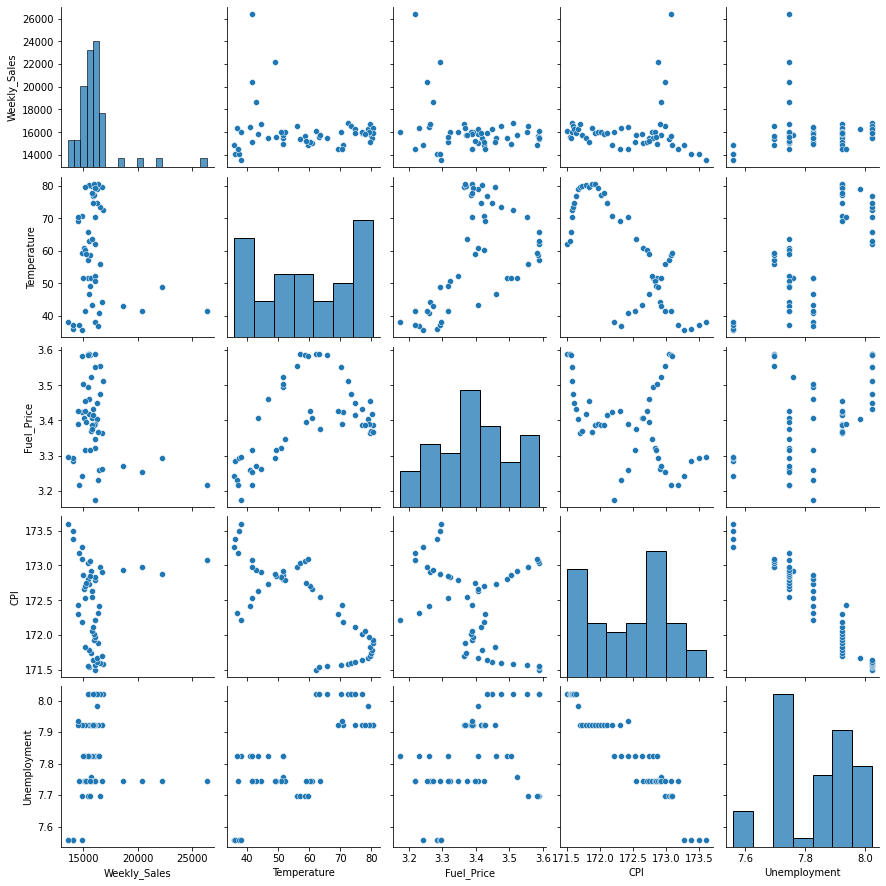

In [ ]:
sns.pairplot(data_store.drop(['Week','IsHoliday'],axis=1))

In [ ]:
data = train.drop(['Year','Month','Week'],axis=1).merge(features.drop(['IsHoliday','Week'],axis=1),on=['Store','Date'])
# data = pd.concat([data.drop(['Type'],axis=1),pd.get_dummies(data['Type'])]).fillna(0)
data = pd.concat([data.drop(['Type'],axis=1),pd.get_dummies(data['Type'])],axis=1).fillna(0)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C
0,1,1,2010-02-05,24924.50,False,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
1,1,2,2010-02-05,50605.27,False,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
2,1,3,2010-02-05,13740.12,False,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
3,1,4,2010-02-05,39954.04,False,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
4,1,5,2010-02-05,32229.38,False,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0


In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype(int)

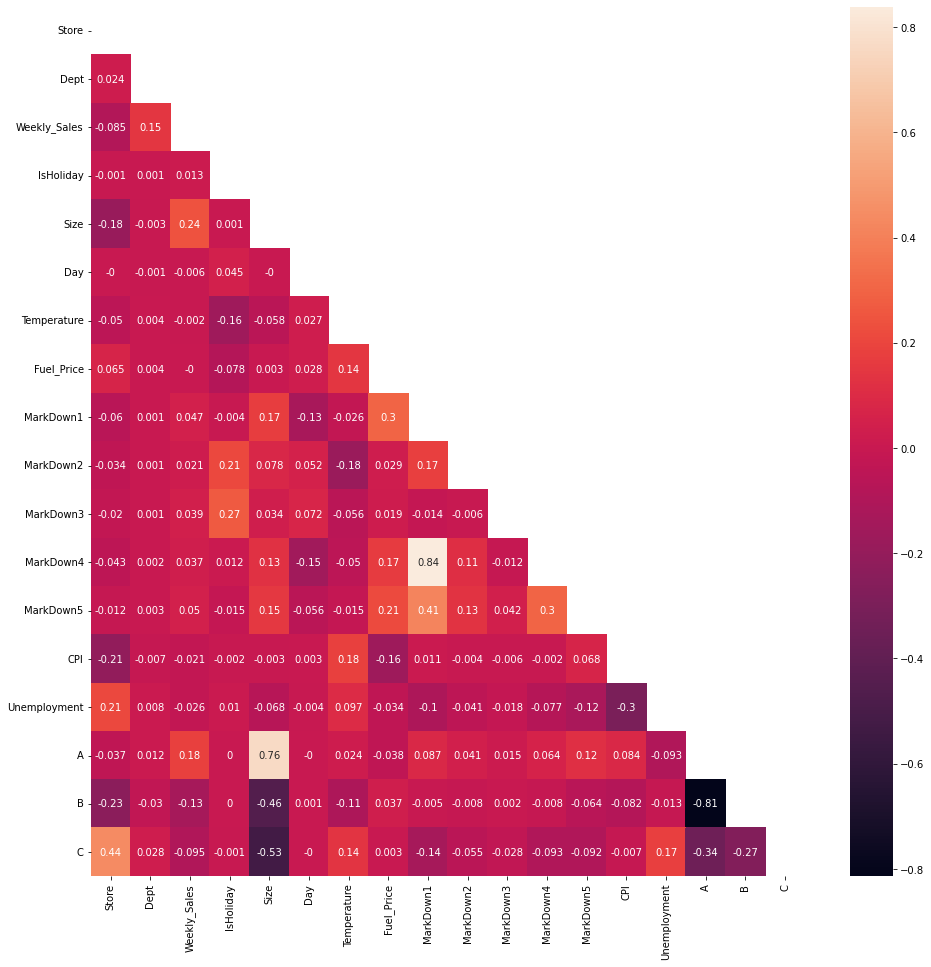

In [ ]:
import numpy as np

df_corr = data.drop(['Date'],axis=1).corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(3)
fig, ax = plt.subplots(figsize=(16,16))    
sns.heatmap(df_corr, annot=True,ax=ax)

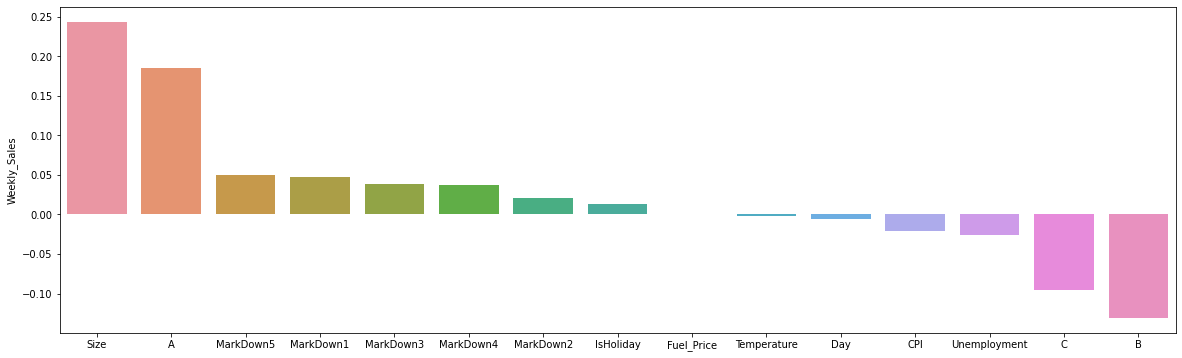

In [ ]:
f, ax = plt.subplots(figsize=(20, 6))
data = df_corr['Weekly_Sales'].dropna().sort_values(ascending=False)
sns.barplot(x=data.index,y=data)

In [ ]:
from fbprophet import Prophet

data = train.drop(['Year','Month','Week'],axis=1).merge(features.drop(['IsHoliday','Week'],axis=1),on=['Store','Date'])
data = pd.concat([data.drop(['Type'],axis=1),pd.get_dummies(data['Type'])],axis=1).fillna(0)
data['IsHoliday'] = data['IsHoliday'].astype(int)

# prepare expected column names

data['ds']= pd.to_datetime(data['Date'])
data =  data.sort_values(['ds'],ascending='True')
data['y']=data['Weekly_Sales']

data = data.drop(['Date','Weekly_Sales'],axis=1).reset_index(drop=True)

data.head()

,Store,Dept,IsHoliday,Size,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C,ds,y
0,1,1,0,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2010-02-05,24924.50
1,35,3,0,103681,5,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,0,1,0,2010-02-05,14612.19
2,35,4,0,103681,5,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,0,1,0,2010-02-05,26323.15
3,35,5,0,103681,5,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,0,1,0,2010-02-05,36414.63
4,35,6,0,103681,5,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,0,1,0,2010-02-05,11437.81


In [ ]:
data = data[data.Store==1]
data.shape

(10244, 19)

In [ ]:
x_train = data[:-1000]
x_train.head()

,Store,Dept,IsHoliday,Size,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C,ds,y
0,1,1,0,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2010-02-05,24924.50
2883,1,82,0,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2010-02-05,19484.03
2884,1,59,0,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2010-02-05,1409.34
2885,1,58,0,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2010-02-05,7659.97
2886,1,56,0,151315,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2010-02-05,2567.36


In [ ]:
x_train.shape

(9244, 19)

In [ ]:
x_test = data[-1000:]
x_test.head()

,Store,Dept,IsHoliday,Size,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C,ds,y
380121,1,91,0,151315,27,82.66,3.407,7146.9,389.02,1.59,10267.54,4325.19,221.941295,6.908,1,0,0,2012-07-27,57662.60
380122,1,90,0,151315,27,82.66,3.407,7146.9,389.02,1.59,10267.54,4325.19,221.941295,6.908,1,0,0,2012-07-27,81315.00
380123,1,87,0,151315,27,82.66,3.407,7146.9,389.02,1.59,10267.54,4325.19,221.941295,6.908,1,0,0,2012-07-27,49828.59
380124,1,85,0,151315,27,82.66,3.407,7146.9,389.02,1.59,10267.54,4325.19,221.941295,6.908,1,0,0,2012-07-27,3434.69
380125,1,83,0,151315,27,82.66,3.407,7146.9,389.02,1.59,10267.54,4325.19,221.941295,6.908,1,0,0,2012-07-27,4910.05


In [ ]:
# define the model
model = Prophet(changepoint_prior_scale=0.05, interval_width=0.95,growth = 'linear',seasonality_mode = 'multiplicative', \
               yearly_seasonality=20, \
            weekly_seasonality=True, \
            daily_seasonality=True, \
            changepoint_range=0.9)

In [ ]:
for c in ['Dept','IsHoliday','CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Unemployment']:
  print(c)
  model.add_regressor(name=c, prior_scale=None, standardize='auto', mode='additive')

Dept
IsHoliday
CPI
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
Unemployment


In [ ]:
# fit the model
model.fit(data[['ds','y','Dept','IsHoliday','CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Unemployment']])

In [ ]:
# use the model to make a forecast
forecast = model.predict(x_test[['ds','Dept','IsHoliday','CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Unemployment']])
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2012-07-27  36069.587113 -12322.507744  87218.507871
1 2012-07-27  24210.667108 -26059.891558  73319.931131
2 2012-07-27  23881.252664 -27559.281764  73969.300074
3 2012-07-27  23222.423774 -25101.013603  72494.483064
4 2012-07-27  22234.180441 -25967.218063  71437.863666


In [ ]:
x_test[['ds','Size', 'CPI', 'Unemployment','A','B','C','y']].head()

,ds,Size,CPI,Unemployment,A,B,C,y
380121,2012-07-27,151315,221.941295,6.908,1,0,0,57662.60
380122,2012-07-27,151315,221.941295,6.908,1,0,0,81315.00
380123,2012-07-27,151315,221.941295,6.908,1,0,0,49828.59
380124,2012-07-27,151315,221.941295,6.908,1,0,0,3434.69
380125,2012-07-27,151315,221.941295,6.908,1,0,0,4910.05


In [ ]:
forecast_data = pd.concat([forecast[['yhat', 'yhat_lower', 'yhat_upper']],x_test['y'].reset_index(drop=True)],axis=1)
forecast_data.head()

,yhat,yhat_lower,yhat_upper,y
0,36069.587113,-12322.507744,87218.507871,57662.60
1,24210.667108,-26059.891558,73319.931131,81315.00
2,23881.252664,-27559.281764,73969.300074,49828.59
3,23222.423774,-25101.013603,72494.483064,3434.69
4,22234.180441,-25967.218063,71437.863666,4910.05


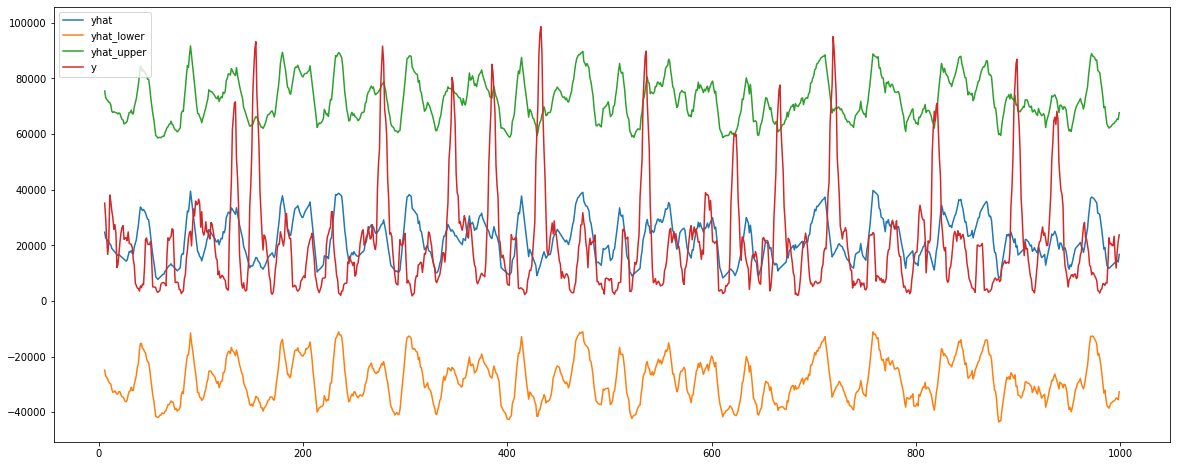

In [ ]:
forecast_data.rolling(window=7).mean().plot(figsize=(20,8))